#Breast Cancer Detection

In [2]:
"""
Dataset information:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
## 'data.frame':    569 obs. of  31 variables:
##  $ diagnosis              : Factor w/ 2 levels "Benign","Malignant": 2 2 2 2 2 2 2 2 2 2 ...
##  $ radius_mean            : num  18 20.6 19.7 11.4 20.3 ...
##  $ texture_mean           : num  10.4 17.8 21.2 20.4 14.3 ...
##  $ perimeter_mean         : num  122.8 132.9 130 77.6 135.1 ...
##  $ area_mean              : num  1001 1326 1203 386 1297 ...
##  $ smoothness_mean        : num  0.1184 0.0847 0.1096 0.1425 0.1003 ...
##  $ compactness_mean       : num  0.2776 0.0786 0.1599 0.2839 0.1328 ...
##  $ concavity_mean         : num  0.3001 0.0869 0.1974 0.2414 0.198 ...
##  $ concave.points_mean    : num  0.1471 0.0702 0.1279 0.1052 0.1043 ...
##  $ symmetry_mean          : num  0.242 0.181 0.207 0.26 0.181 ...
##  $ fractal_dimension_mean : num  0.0787 0.0567 0.06 0.0974 0.0588 ...
##  $ radius_se              : num  1.095 0.543 0.746 0.496 0.757 ...
##  $ texture_se             : num  0.905 0.734 0.787 1.156 0.781 ...
##  $ perimeter_se           : num  8.59 3.4 4.58 3.44 5.44 ...
##  $ area_se                : num  153.4 74.1 94 27.2 94.4 ...
##  $ smoothness_se          : num  0.0064 0.00522 0.00615 0.00911 0.01149 ...
##  $ compactness_se         : num  0.049 0.0131 0.0401 0.0746 0.0246 ...
##  $ concavity_se           : num  0.0537 0.0186 0.0383 0.0566 0.0569 ...
##  $ concave.points_se      : num  0.0159 0.0134 0.0206 0.0187 0.0188 ...
##  $ symmetry_se            : num  0.03 0.0139 0.0225 0.0596 0.0176 ...
##  $ fractal_dimension_se   : num  0.00619 0.00353 0.00457 0.00921 0.00511 ...
##  $ radius_worst           : num  25.4 25 23.6 14.9 22.5 ...
##  $ texture_worst          : num  17.3 23.4 25.5 26.5 16.7 ...
##  $ perimeter_worst        : num  184.6 158.8 152.5 98.9 152.2 ...
##  $ area_worst             : num  2019 1956 1709 568 1575 ...
##  $ smoothness_worst       : num  0.162 0.124 0.144 0.21 0.137 ...
##  $ compactness_worst      : num  0.666 0.187 0.424 0.866 0.205 ...
##  $ concavity_worst        : num  0.712 0.242 0.45 0.687 0.4 ...
##  $ concave.points_worst   : num  0.265 0.186 0.243 0.258 0.163 ...
##  $ symmetry_worst         : num  0.46 0.275 0.361 0.664 0.236 ...
##  $ fractal_dimension_worst: num  0.1189 0.089 0.0876 0.173 0.0768 ...

"""
print()

###Loading Libraries and Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_ = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/breastcancerdata.csv")

In [ ]:
df_.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


###Exploring Data

In [ ]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df_.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
df_.shape

(569, 33)

In [ ]:
df_.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
df_.drop(columns=['Unnamed: 32'], inplace=True)

###Model Preprocessing

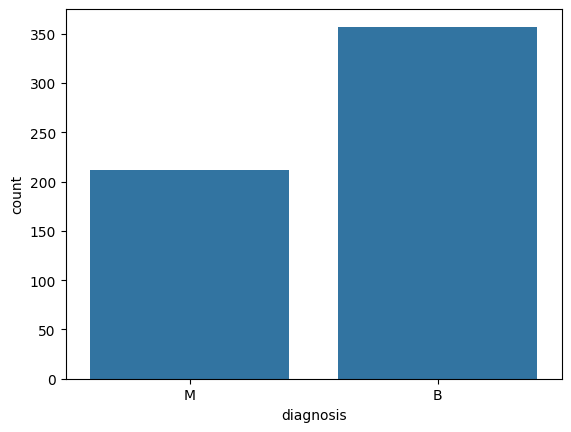

In [ ]:
sns.countplot(data=df_, x="diagnosis")
plt.show()

In [ ]:
#Label encoding the diagnosis column
df_["diagnosis"] = df_["diagnosis"].replace(to_replace=['M', 'B'], value=[1, 0])

In [ ]:
#Splitting data into Dependent and Independent Variables
X = df_.drop(columns=["id","diagnosis"])
y = df_.iloc[:,1]

In [ ]:
#Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
#Performing Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                   random_state=104,
                                   test_size=0.25,
                                   shuffle=True)

### Neural Network Development

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=30, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
train_hist = model.fit(X_train,y_train,batch_size=64,verbose=1,epochs=100, validation_data=(X_test,y_test))

Epoch 1/100
7/7 [==============================] - 4s 58ms/step - loss: 0.7328 - accuracy: 0.3192 - val_loss: 0.7192 - val_accuracy: 0.3427
Epoch 2/100
7/7 [==============================] - 0s 14ms/step - loss: 0.7161 - accuracy: 0.3685 - val_loss: 0.7074 - val_accuracy: 0.3566
Epoch 3/100
7/7 [==============================] - 0s 13ms/step - loss: 0.7005 - accuracy: 0.4648 - val_loss: 0.6938 - val_accuracy: 0.4476
Epoch 4/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6795 - accuracy: 0.6056 - val_loss: 0.6786 - val_accuracy: 0.6713
Epoch 5/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6664 - accuracy: 0.6972 - val_loss: 0.6629 - val_accuracy: 0.7343
Epoch 6/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6482 - accuracy: 0.7606 - val_loss: 0.6485 - val_accuracy: 0.7413
Epoch 7/100
7/7 [==============================] - 0s 11ms/step - loss: 0.6352 - accuracy: 0.7488 - val_loss: 0.6360 - val_accuracy: 0.7273
Epoch 8/100
7/7 [===

###Plotting to understand the progress of training

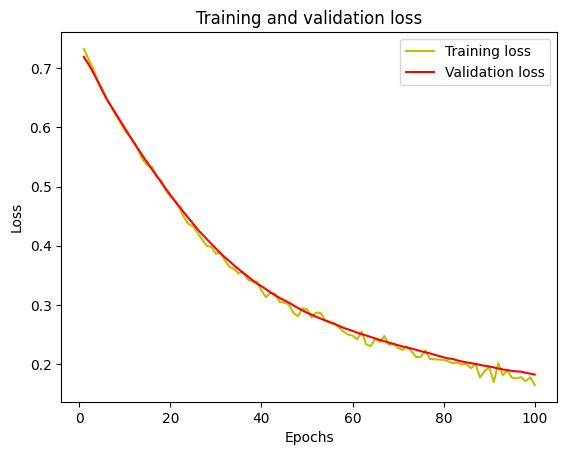

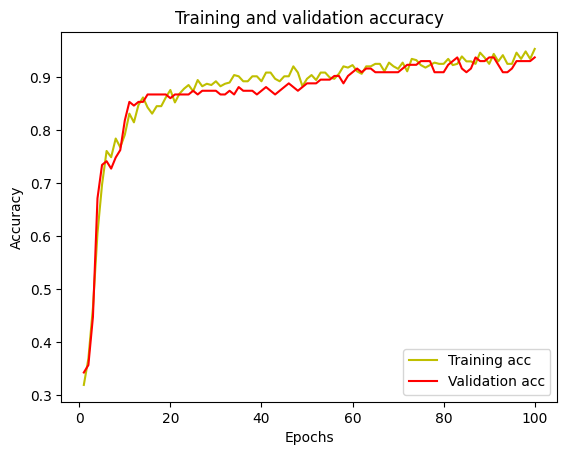

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = train_hist.history['loss']
val_loss = train_hist.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = train_hist.history['accuracy']  #Use accuracy if acc doesn't work
val_acc = train_hist.history['val_accuracy']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

5/5 [==============================] - 0s 2ms/step


# **By Kartavya Desai**



